# Lab 4 

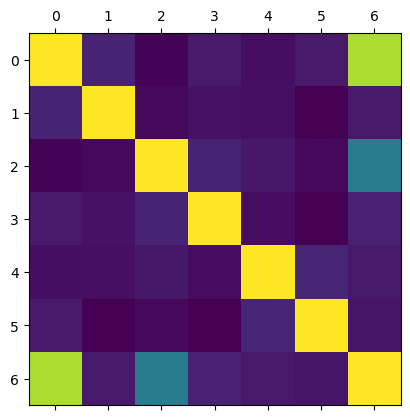

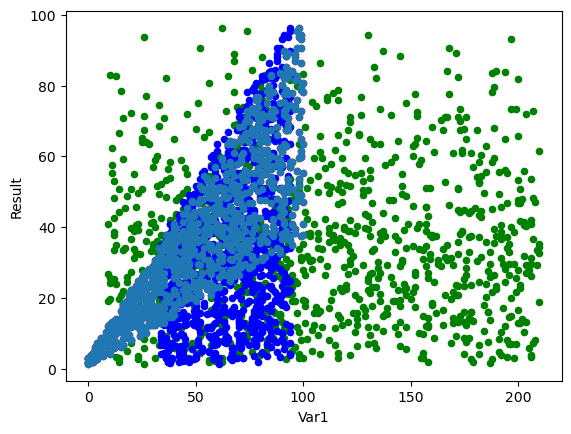

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab4/data.csv')
#df.info()
corr =  df.corr()
plt.matshow(corr)
plt.show()
corr.style.background_gradient(cmap='coolwarm')


# scatter plots
#df.plot.scatter(x='Var1', y= 'Result')

ax1 = df.plot(kind='scatter', x = 'Var1', y= 'Result', color='r')
ax2 = df.plot(kind='scatter', x = 'Var2', y= 'Result', color='g', ax=ax1)
ax3 = df.plot(kind='scatter', x = 'Var3', y= 'Result', color='b', ax=ax1)
df.plot.scatter(x='Var1', y= 'Result', ax=ax1)

x = df.values
scaler = preprocessing.MinMaxScaler().fit(x)
#df = pd.DataFrame(scaler.transform(x))
df = pd.DataFrame(scaler.inverse_transform(x))



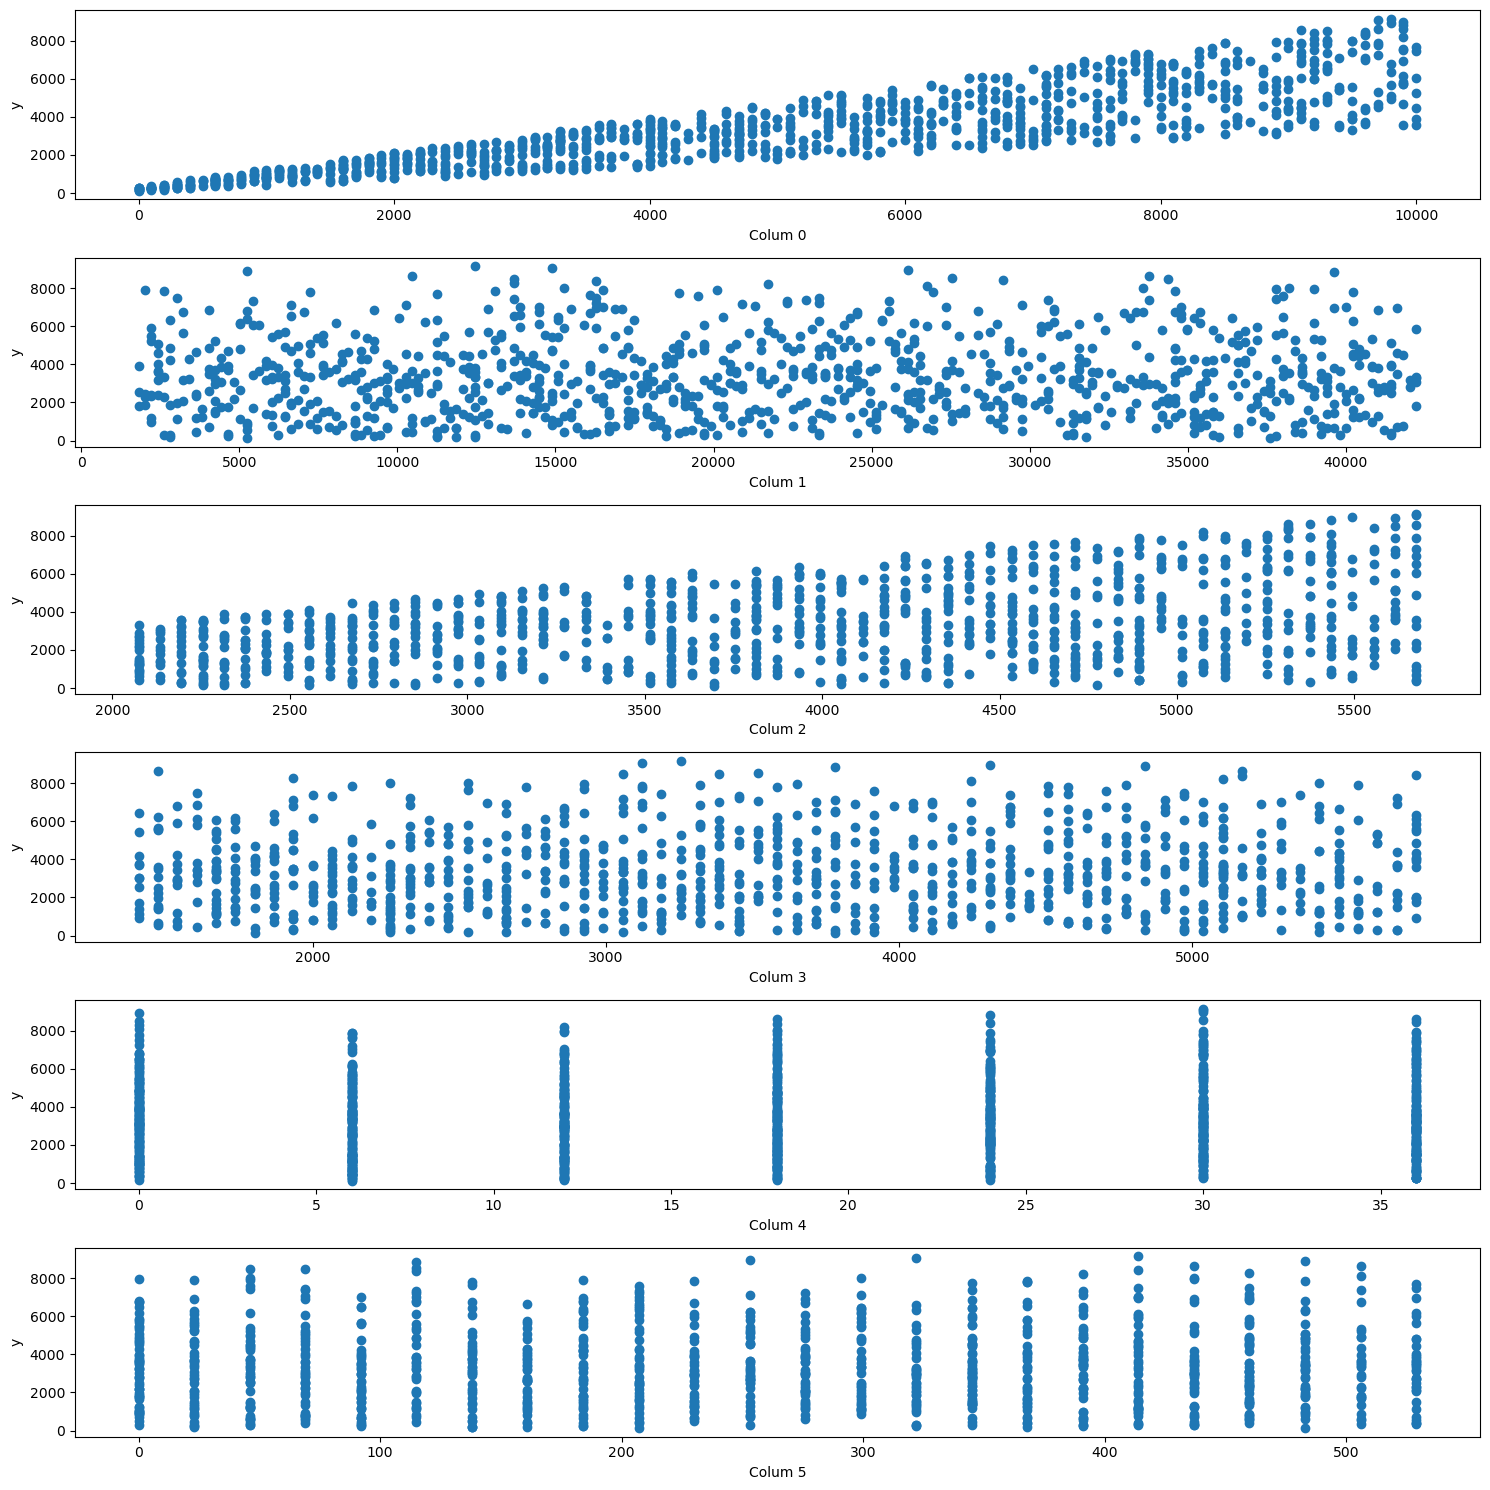

In [2]:
fig, ax = plt.subplots(df.shape[1]-1, figsize=(15,15))

for i in range(df.shape[1] -1): 
    ax[i].scatter(x = df[i], y =df[6])
    ax[i].set_xlabel("Colum " + str(i))
    ax[i].set_ylabel("y")
fig.tight_layout()
plt.show()

#### Training los modelos

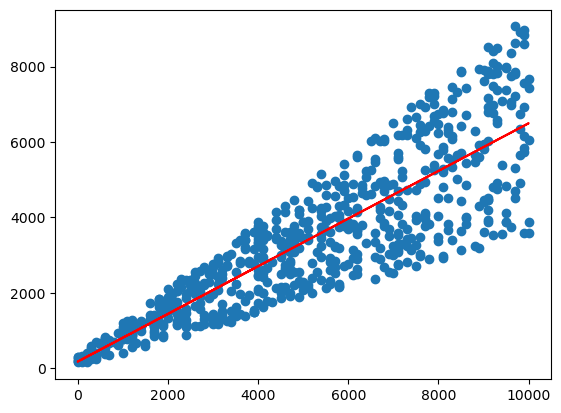

MSE = 1050780.0738967736


In [3]:
X = pd.DataFrame(df[0]) #var 1
y = pd.DataFrame(df[6]) # Result

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42) 

linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
Y_pred = linear_reg.predict(X_train)

plt.scatter(X_train, y_train)             #Plot blue dots with real data
plt.plot(X_train, Y_pred, color='red')    #Plot red line with prediction
plt.show()                                #Show the plot
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) 

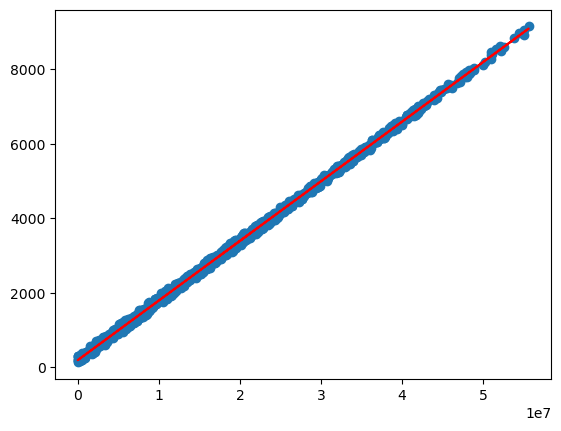

MSE = 4066.754903015239


In [4]:
df[7] = df[0]*df[2]  #Create a new var, based on Var1 and Var3

X = pd.DataFrame(df[7])  #Lets skip making train test set for now, and just
Y = pd.DataFrame(df[6])  #load the entire dataset
linear_reg.fit(X, Y)  # perform linear regression
Y_pred = linear_reg.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(Y,Y_pred)))

